In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
aurangabad_meteo = pd.read_csv('/kaggle/input/maharashtra-aqi/Maharashtra/Metrological Data/Akola.csv', skiprows = 2, delimiter=',')
aurangabad_meteo

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°)
0,2024-01-01T00:00,15.1,94,0.0,981.1,6.5,10.2,71,100
1,2024-01-01T01:00,15.1,93,0.0,982.3,5.2,13.0,102,124
2,2024-01-01T02:00,16.0,89,0.0,982.9,6.6,14.0,112,136
3,2024-01-01T03:00,19.4,77,0.0,984.0,6.0,12.6,123,156
4,2024-01-01T04:00,22.5,68,0.0,984.8,2.3,5.2,141,164
...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,20.0,83,0.0,983.4,5.0,13.0,64,56
8780,2024-12-31T20:00,19.7,84,0.0,982.9,5.8,15.0,106,96
8781,2024-12-31T21:00,19.3,86,0.0,982.4,7.6,16.1,115,108
8782,2024-12-31T22:00,18.8,89,0.0,982.1,6.3,14.5,114,104


In [3]:
aurangabad_pollutants = pd.read_csv('/kaggle/input/maharashtra-aqi/Maharashtra/Pollutants/Aurangabad.csv', delimiter= ',')
aurangabad_pollutants['Timestamp'] = aurangabad_meteo['time']
aurangabad_pollutants.rename(columns={'Timestamp': 'time'}, inplace=True)
aurangabad_pollutants

,time,PM2.5 (µg/m³),PM10 (µg/m³),NO (µg/m³),NO2 (µg/m³),NOx (ppb),NH3 (µg/m³),SO2 (µg/m³),CO (mg/m³),Ozone (µg/m³),...,MP-Xylene (µg/m³),AT (°C),RH (%),WS (m/s),WD (deg),RF (mm),TOT-RF (mm),SR (W/mt2),BP (mmHg),VWS (m/s)
0,2024-01-01T00:00,84.30,144.26,3.46,24.68,13.05,7.56,9.48,0.90,11.47,...,3.75,18.44,68.85,1.37,145.65,0.0,0.0,3.58,NaN,NaN
1,2024-01-01T01:00,80.62,142.68,3.63,21.62,11.58,7.53,9.78,1.03,11.26,...,3.59,17.87,70.03,1.36,142.13,0.0,0.0,3.50,NaN,NaN
2,2024-01-01T02:00,79.93,124.48,3.65,20.25,10.87,7.60,9.75,1.10,11.12,...,3.36,17.61,69.68,1.75,162.96,0.0,0.0,3.50,NaN,NaN
3,2024-01-01T03:00,80.33,121.83,3.62,19.32,10.36,7.52,10.59,1.12,11.39,...,3.18,17.12,71.12,1.88,153.89,0.0,0.0,3.67,NaN,NaN
4,2024-01-01T04:00,75.95,106.04,3.68,17.81,9.62,7.62,10.58,1.09,10.78,...,2.88,16.77,72.85,1.52,156.05,0.0,0.0,3.67,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,73.47,150.04,3.72,21.48,10.10,15.38,5.26,1.00,37.14,...,2.31,22.80,69.72,1.01,238.58,0.0,0.0,3.50,NaN,NaN
8780,2024-12-31T20:00,65.98,146.92,3.99,22.66,12.18,14.99,6.76,1.19,31.38,...,2.69,21.93,74.12,1.02,250.55,0.0,0.0,3.67,NaN,NaN
8781,2024-12-31T21:00,69.52,148.13,3.94,28.66,14.67,15.50,8.24,1.80,18.03,...,2.80,21.27,77.30,1.06,250.80,0.0,0.0,3.67,NaN,NaN
8782,2024-12-31T22:00,68.24,144.40,4.78,27.04,14.82,14.86,8.68,2.12,21.73,...,1.58,20.58,78.88,1.16,239.80,0.0,0.0,3.67,NaN,NaN


In [4]:
aurangabad = pd.merge(aurangabad_meteo.iloc[:, :], aurangabad_pollutants.iloc[:, 0:3], on='time')
aurangabad

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°),PM2.5 (µg/m³),PM10 (µg/m³)
0,2024-01-01T00:00,15.1,94,0.0,981.1,6.5,10.2,71,100,84.30,144.26
1,2024-01-01T01:00,15.1,93,0.0,982.3,5.2,13.0,102,124,80.62,142.68
2,2024-01-01T02:00,16.0,89,0.0,982.9,6.6,14.0,112,136,79.93,124.48
3,2024-01-01T03:00,19.4,77,0.0,984.0,6.0,12.6,123,156,80.33,121.83
4,2024-01-01T04:00,22.5,68,0.0,984.8,2.3,5.2,141,164,75.95,106.04
...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,20.0,83,0.0,983.4,5.0,13.0,64,56,73.47,150.04
8780,2024-12-31T20:00,19.7,84,0.0,982.9,5.8,15.0,106,96,65.98,146.92
8781,2024-12-31T21:00,19.3,86,0.0,982.4,7.6,16.1,115,108,69.52,148.13
8782,2024-12-31T22:00,18.8,89,0.0,982.1,6.3,14.5,114,104,68.24,144.40


In [5]:
aurangabad['city'] = 'Aurangabad'
aurangabad

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°),PM2.5 (µg/m³),PM10 (µg/m³),city
0,2024-01-01T00:00,15.1,94,0.0,981.1,6.5,10.2,71,100,84.30,144.26,Aurangabad
1,2024-01-01T01:00,15.1,93,0.0,982.3,5.2,13.0,102,124,80.62,142.68,Aurangabad
2,2024-01-01T02:00,16.0,89,0.0,982.9,6.6,14.0,112,136,79.93,124.48,Aurangabad
3,2024-01-01T03:00,19.4,77,0.0,984.0,6.0,12.6,123,156,80.33,121.83,Aurangabad
4,2024-01-01T04:00,22.5,68,0.0,984.8,2.3,5.2,141,164,75.95,106.04,Aurangabad
...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,20.0,83,0.0,983.4,5.0,13.0,64,56,73.47,150.04,Aurangabad
8780,2024-12-31T20:00,19.7,84,0.0,982.9,5.8,15.0,106,96,65.98,146.92,Aurangabad
8781,2024-12-31T21:00,19.3,86,0.0,982.4,7.6,16.1,115,108,69.52,148.13,Aurangabad
8782,2024-12-31T22:00,18.8,89,0.0,982.1,6.3,14.5,114,104,68.24,144.40,Aurangabad


In [6]:
aurangabad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   time                      8784 non-null   object 
 1   temperature_2m (°C)       8784 non-null   float64
 2   relative_humidity_2m (%)  8784 non-null   int64  
 3   rain (mm)                 8784 non-null   float64
 4   surface_pressure (hPa)    8784 non-null   float64
 5   wind_speed_10m (km/h)     8784 non-null   float64
 6   wind_speed_100m (km/h)    8784 non-null   float64
 7   wind_direction_10m (°)    8784 non-null   int64  
 8   wind_direction_100m (°)   8784 non-null   int64  
 9   PM2.5 (µg/m³)             8730 non-null   float64
 10  PM10 (µg/m³)              8778 non-null   float64
 11  city                      8784 non-null   object 
dtypes: float64(7), int64(3), object(2)
memory usage: 823.6+ KB


In [7]:
aurangabad = aurangabad.interpolate()
aurangabad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   time                      8784 non-null   object 
 1   temperature_2m (°C)       8784 non-null   float64
 2   relative_humidity_2m (%)  8784 non-null   int64  
 3   rain (mm)                 8784 non-null   float64
 4   surface_pressure (hPa)    8784 non-null   float64
 5   wind_speed_10m (km/h)     8784 non-null   float64
 6   wind_speed_100m (km/h)    8784 non-null   float64
 7   wind_direction_10m (°)    8784 non-null   int64  
 8   wind_direction_100m (°)   8784 non-null   int64  
 9   PM2.5 (µg/m³)             8784 non-null   float64
 10  PM10 (µg/m³)              8784 non-null   float64
 11  city                      8784 non-null   object 
dtypes: float64(7), int64(3), object(2)
memory usage: 823.6+ KB


In [8]:
for col in ['PM2.5 (µg/m³)', 'PM10 (µg/m³)']:
    delay1_col = col + "_delay1"
    aurangabad[delay1_col] = aurangabad[col].shift(1)
    delay2_col = col + "_delay2"
    aurangabad[delay2_col] = aurangabad[col].shift(2)
    aurangabad.loc[0, delay1_col] = aurangabad[col].iloc[-1]
    aurangabad.loc[1, delay2_col] = aurangabad[col].iloc[-1]
    aurangabad.loc[0, delay2_col] = aurangabad[col].iloc[-2]

aurangabad

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°),PM2.5 (µg/m³),PM10 (µg/m³),city,PM2.5 (µg/m³)_delay1,PM2.5 (µg/m³)_delay2,PM10 (µg/m³)_delay1,PM10 (µg/m³)_delay2
0,2024-01-01T00:00,15.1,94,0.0,981.1,6.5,10.2,71,100,84.30,144.26,Aurangabad,81.61,68.24,163.79,144.40
1,2024-01-01T01:00,15.1,93,0.0,982.3,5.2,13.0,102,124,80.62,142.68,Aurangabad,84.30,81.61,144.26,163.79
2,2024-01-01T02:00,16.0,89,0.0,982.9,6.6,14.0,112,136,79.93,124.48,Aurangabad,80.62,84.30,142.68,144.26
3,2024-01-01T03:00,19.4,77,0.0,984.0,6.0,12.6,123,156,80.33,121.83,Aurangabad,79.93,80.62,124.48,142.68
4,2024-01-01T04:00,22.5,68,0.0,984.8,2.3,5.2,141,164,75.95,106.04,Aurangabad,80.33,79.93,121.83,124.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,20.0,83,0.0,983.4,5.0,13.0,64,56,73.47,150.04,Aurangabad,49.31,42.17,111.14,97.34
8780,2024-12-31T20:00,19.7,84,0.0,982.9,5.8,15.0,106,96,65.98,146.92,Aurangabad,73.47,49.31,150.04,111.14
8781,2024-12-31T21:00,19.3,86,0.0,982.4,7.6,16.1,115,108,69.52,148.13,Aurangabad,65.98,73.47,146.92,150.04
8782,2024-12-31T22:00,18.8,89,0.0,982.1,6.3,14.5,114,104,68.24,144.40,Aurangabad,69.52,65.98,148.13,146.92


In [9]:
amravati_meteo = pd.read_csv('/kaggle/input/maharashtra-aqi/Maharashtra/Metrological Data/Amravati.csv', skiprows = 2, delimiter=',')
amravati_meteo

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°)
0,2024-01-01T00:00,16.3,78,0.0,974.7,5.5,7.1,58,105
1,2024-01-01T01:00,16.2,82,0.0,975.8,5.2,5.9,65,137
2,2024-01-01T02:00,17.5,76,0.0,976.8,7.4,12.5,113,141
3,2024-01-01T03:00,20.5,68,0.0,977.9,7.8,14.8,103,119
4,2024-01-01T04:00,23.1,58,0.0,978.9,6.4,8.6,106,112
...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,20.1,82,0.0,977.0,9.8,19.5,44,41
8780,2024-12-31T20:00,19.6,85,0.0,976.5,10.7,20.9,48,46
8781,2024-12-31T21:00,19.1,86,0.0,975.9,11.5,22.5,55,52
8782,2024-12-31T22:00,18.8,87,0.0,975.5,10.8,21.5,58,58


In [10]:
amravati_pollutants = pd.read_csv('/kaggle/input/maharashtra-aqi/Maharashtra/Pollutants/Amravati.csv', delimiter= ',')
amravati_pollutants['Timestamp'] = amravati_meteo['time']
amravati_pollutants.rename(columns={'Timestamp': 'time'}, inplace=True)
amravati_pollutants

,time,PM2.5 (µg/m³),PM10 (µg/m³),NO (µg/m³),NO2 (µg/m³),NOx (ppb),NH3 (µg/m³),SO2 (µg/m³),CO (mg/m³),Ozone (µg/m³),...,MP-Xylene (µg/m³),AT (°C),RH (%),WS (m/s),WD (deg),RF (mm),TOT-RF (mm),SR (W/mt2),BP (mmHg),VWS (m/s)
0,2024-01-01T00:00,90.08,154.58,0.62,19.09,9.67,9.51,41.12,0.92,64.66,...,1.89,21.74,66.38,0.88,189.16,0.0,0.0,0.0,NaN,NaN
1,2024-01-01T01:00,92.24,161.94,0.62,16.76,8.45,9.22,37.90,0.85,63.92,...,1.70,21.14,67.14,0.70,186.70,0.0,0.0,0.0,NaN,NaN
2,2024-01-01T02:00,95.82,156.00,0.70,16.69,8.48,9.07,33.02,0.81,64.29,...,1.69,20.29,70.26,0.44,216.24,0.0,0.0,0.0,NaN,NaN
3,2024-01-01T03:00,95.10,150.36,0.74,18.54,9.47,8.88,27.04,0.80,45.24,...,1.67,18.68,74.93,0.40,196.63,0.0,0.0,0.0,NaN,NaN
4,2024-01-01T04:00,95.40,158.63,0.85,22.76,11.77,9.10,22.73,0.85,30.65,...,1.70,17.34,79.31,0.61,127.48,0.0,0.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,53.08,117.99,40.18,54.14,75.21,24.74,9.50,2.15,1.25,...,9.34,25.36,64.18,0.29,137.34,0.0,0.0,0.0,NaN,NaN
8780,2024-12-31T20:00,52.87,137.68,26.54,49.28,60.47,20.24,8.68,1.79,1.27,...,15.43,24.86,65.97,0.34,140.00,0.0,0.0,0.0,NaN,NaN
8781,2024-12-31T21:00,47.77,152.32,11.34,41.55,42.24,18.64,7.59,1.24,5.80,...,12.54,24.46,67.32,0.40,119.51,0.0,0.0,0.0,NaN,NaN
8782,2024-12-31T22:00,49.98,143.38,2.30,27.66,23.83,13.92,6.74,0.70,13.02,...,7.29,24.02,68.67,0.34,115.01,0.0,0.0,0.0,NaN,NaN


In [11]:
amravati = pd.merge(amravati_meteo.iloc[:, :], amravati_pollutants.iloc[:, 0:3], on='time')
amravati

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°),PM2.5 (µg/m³),PM10 (µg/m³)
0,2024-01-01T00:00,16.3,78,0.0,974.7,5.5,7.1,58,105,90.08,154.58
1,2024-01-01T01:00,16.2,82,0.0,975.8,5.2,5.9,65,137,92.24,161.94
2,2024-01-01T02:00,17.5,76,0.0,976.8,7.4,12.5,113,141,95.82,156.00
3,2024-01-01T03:00,20.5,68,0.0,977.9,7.8,14.8,103,119,95.10,150.36
4,2024-01-01T04:00,23.1,58,0.0,978.9,6.4,8.6,106,112,95.40,158.63
...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,20.1,82,0.0,977.0,9.8,19.5,44,41,53.08,117.99
8780,2024-12-31T20:00,19.6,85,0.0,976.5,10.7,20.9,48,46,52.87,137.68
8781,2024-12-31T21:00,19.1,86,0.0,975.9,11.5,22.5,55,52,47.77,152.32
8782,2024-12-31T22:00,18.8,87,0.0,975.5,10.8,21.5,58,58,49.98,143.38


In [12]:
amravati['city'] = 'Amravati'
amravati

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°),PM2.5 (µg/m³),PM10 (µg/m³),city
0,2024-01-01T00:00,16.3,78,0.0,974.7,5.5,7.1,58,105,90.08,154.58,Amravati
1,2024-01-01T01:00,16.2,82,0.0,975.8,5.2,5.9,65,137,92.24,161.94,Amravati
2,2024-01-01T02:00,17.5,76,0.0,976.8,7.4,12.5,113,141,95.82,156.00,Amravati
3,2024-01-01T03:00,20.5,68,0.0,977.9,7.8,14.8,103,119,95.10,150.36,Amravati
4,2024-01-01T04:00,23.1,58,0.0,978.9,6.4,8.6,106,112,95.40,158.63,Amravati
...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,20.1,82,0.0,977.0,9.8,19.5,44,41,53.08,117.99,Amravati
8780,2024-12-31T20:00,19.6,85,0.0,976.5,10.7,20.9,48,46,52.87,137.68,Amravati
8781,2024-12-31T21:00,19.1,86,0.0,975.9,11.5,22.5,55,52,47.77,152.32,Amravati
8782,2024-12-31T22:00,18.8,87,0.0,975.5,10.8,21.5,58,58,49.98,143.38,Amravati


In [13]:
amravati.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   time                      8784 non-null   object 
 1   temperature_2m (°C)       8784 non-null   float64
 2   relative_humidity_2m (%)  8784 non-null   int64  
 3   rain (mm)                 8784 non-null   float64
 4   surface_pressure (hPa)    8784 non-null   float64
 5   wind_speed_10m (km/h)     8784 non-null   float64
 6   wind_speed_100m (km/h)    8784 non-null   float64
 7   wind_direction_10m (°)    8784 non-null   int64  
 8   wind_direction_100m (°)   8784 non-null   int64  
 9   PM2.5 (µg/m³)             8776 non-null   float64
 10  PM10 (µg/m³)              8776 non-null   float64
 11  city                      8784 non-null   object 
dtypes: float64(7), int64(3), object(2)
memory usage: 823.6+ KB


In [14]:
amravati = amravati.interpolate()
amravati.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   time                      8784 non-null   object 
 1   temperature_2m (°C)       8784 non-null   float64
 2   relative_humidity_2m (%)  8784 non-null   int64  
 3   rain (mm)                 8784 non-null   float64
 4   surface_pressure (hPa)    8784 non-null   float64
 5   wind_speed_10m (km/h)     8784 non-null   float64
 6   wind_speed_100m (km/h)    8784 non-null   float64
 7   wind_direction_10m (°)    8784 non-null   int64  
 8   wind_direction_100m (°)   8784 non-null   int64  
 9   PM2.5 (µg/m³)             8784 non-null   float64
 10  PM10 (µg/m³)              8784 non-null   float64
 11  city                      8784 non-null   object 
dtypes: float64(7), int64(3), object(2)
memory usage: 823.6+ KB


In [15]:
for col in ['PM2.5 (µg/m³)', 'PM10 (µg/m³)']:
    delay1_col = col + "_delay1"
    amravati[delay1_col] = amravati[col].shift(1)
    delay2_col = col + "_delay2"
    amravati[delay2_col] = amravati[col].shift(2)
    amravati.loc[0, delay1_col] = amravati[col].iloc[-1]
    amravati.loc[1, delay2_col] = amravati[col].iloc[-1]
    amravati.loc[0, delay2_col] = amravati[col].iloc[-2]

amravati

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°),PM2.5 (µg/m³),PM10 (µg/m³),city,PM2.5 (µg/m³)_delay1,PM2.5 (µg/m³)_delay2,PM10 (µg/m³)_delay1,PM10 (µg/m³)_delay2
0,2024-01-01T00:00,16.3,78,0.0,974.7,5.5,7.1,58,105,90.08,154.58,Amravati,50.31,49.98,116.22,143.38
1,2024-01-01T01:00,16.2,82,0.0,975.8,5.2,5.9,65,137,92.24,161.94,Amravati,90.08,50.31,154.58,116.22
2,2024-01-01T02:00,17.5,76,0.0,976.8,7.4,12.5,113,141,95.82,156.00,Amravati,92.24,90.08,161.94,154.58
3,2024-01-01T03:00,20.5,68,0.0,977.9,7.8,14.8,103,119,95.10,150.36,Amravati,95.82,92.24,156.00,161.94
4,2024-01-01T04:00,23.1,58,0.0,978.9,6.4,8.6,106,112,95.40,158.63,Amravati,95.10,95.82,150.36,156.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,20.1,82,0.0,977.0,9.8,19.5,44,41,53.08,117.99,Amravati,46.11,45.18,90.24,83.15
8780,2024-12-31T20:00,19.6,85,0.0,976.5,10.7,20.9,48,46,52.87,137.68,Amravati,53.08,46.11,117.99,90.24
8781,2024-12-31T21:00,19.1,86,0.0,975.9,11.5,22.5,55,52,47.77,152.32,Amravati,52.87,53.08,137.68,117.99
8782,2024-12-31T22:00,18.8,87,0.0,975.5,10.8,21.5,58,58,49.98,143.38,Amravati,47.77,52.87,152.32,137.68


In [16]:
chandrapur_meteo = pd.read_csv('/kaggle/input/maharashtra-aqi/Maharashtra/Metrological Data/Chandrapur.csv', skiprows=2, delimiter=',')
chandrapur_meteo

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°)
0,2024-01-01T00:00,16.4,88,0.0,993.1,7.7,13.1,139,122
1,2024-01-01T01:00,16.3,88,0.0,994.1,6.5,10.9,93,124
2,2024-01-01T02:00,17.9,82,0.0,994.8,6.8,11.7,93,124
3,2024-01-01T03:00,21.1,70,0.0,996.0,5.3,13.4,118,126
4,2024-01-01T04:00,24.1,60,0.0,996.5,5.4,7.4,138,141
...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,20.7,77,0.0,994.5,2.3,5.4,151,96
8780,2024-12-31T20:00,20.1,79,0.0,994.3,5.8,12.9,64,63
8781,2024-12-31T21:00,19.8,79,0.0,993.6,5.7,16.4,46,50
8782,2024-12-31T22:00,19.7,77,0.0,993.5,9.4,19.9,32,41


In [17]:
chandrapur_pollutants = pd.read_csv('/kaggle/input/maharashtra-aqi/Maharashtra/Pollutants/Chandrapur.csv', delimiter= ',')
chandrapur_pollutants['Timestamp'] = chandrapur_meteo['time']
chandrapur_pollutants.rename(columns={'Timestamp': 'time'}, inplace=True)
chandrapur_pollutants

,time,PM2.5 (µg/m³),PM10 (µg/m³),NO (µg/m³),NO2 (µg/m³),NOx (ppb),NH3 (µg/m³),SO2 (µg/m³),CO (mg/m³),Ozone (µg/m³),...,MP-Xylene (µg/m³),AT (°C),RH (%),WS (m/s),WD (deg),RF (mm),TOT-RF (mm),SR (W/mt2),BP (mmHg),VWS (m/s)
0,2024-01-01T00:00,111.33,160.00,16.23,42.00,35.57,8.60,4.00,0.09,26.83,...,355.9,25.53,62.00,0.30,119.00,0.0,0.0,4.00,756.33,NaN
1,2024-01-01T01:00,110.00,139.25,8.38,24.92,20.08,8.62,4.28,0.11,27.30,...,NaN,24.88,63.75,0.40,178.00,0.0,0.0,4.00,756.25,NaN
2,2024-01-01T02:00,95.00,123.25,8.30,20.60,17.70,8.60,3.98,0.09,28.25,...,NaN,24.35,65.25,0.30,174.25,0.0,0.0,4.00,756.00,NaN
3,2024-01-01T03:00,87.75,134.25,12.85,36.22,29.75,8.60,3.85,0.08,28.90,...,390.6,24.20,66.50,0.30,123.75,0.0,0.0,4.00,757.25,NaN
4,2024-01-01T04:00,93.00,129.00,15.17,32.17,29.43,8.60,3.67,0.07,29.27,...,408.0,24.03,67.67,0.30,140.33,0.0,0.0,4.00,757.67,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,74.00,258.00,19.98,35.40,35.02,24.92,36.60,0.74,44.55,...,NaN,27.12,51.00,1.10,158.25,0.0,0.0,34.50,751.25,NaN
8780,2024-12-31T20:00,105.25,341.75,15.08,25.42,25.75,23.02,28.32,0.56,33.60,...,NaN,26.12,51.00,1.08,176.75,0.0,0.0,37.75,752.00,NaN
8781,2024-12-31T21:00,68.50,180.75,13.25,14.80,18.65,23.25,25.22,0.50,29.58,...,NaN,25.50,56.50,0.98,179.00,0.0,0.0,71.50,752.00,NaN
8782,2024-12-31T22:00,52.67,132.33,13.30,15.43,19.00,21.80,25.17,0.50,29.53,...,NaN,24.93,58.00,0.40,196.33,0.0,0.0,78.67,752.33,NaN


In [18]:
chandrapur = pd.merge(chandrapur_meteo.iloc[:, :], chandrapur_pollutants.iloc[:, 0:3], on='time')
chandrapur

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°),PM2.5 (µg/m³),PM10 (µg/m³)
0,2024-01-01T00:00,16.4,88,0.0,993.1,7.7,13.1,139,122,111.33,160.00
1,2024-01-01T01:00,16.3,88,0.0,994.1,6.5,10.9,93,124,110.00,139.25
2,2024-01-01T02:00,17.9,82,0.0,994.8,6.8,11.7,93,124,95.00,123.25
3,2024-01-01T03:00,21.1,70,0.0,996.0,5.3,13.4,118,126,87.75,134.25
4,2024-01-01T04:00,24.1,60,0.0,996.5,5.4,7.4,138,141,93.00,129.00
...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,20.7,77,0.0,994.5,2.3,5.4,151,96,74.00,258.00
8780,2024-12-31T20:00,20.1,79,0.0,994.3,5.8,12.9,64,63,105.25,341.75
8781,2024-12-31T21:00,19.8,79,0.0,993.6,5.7,16.4,46,50,68.50,180.75
8782,2024-12-31T22:00,19.7,77,0.0,993.5,9.4,19.9,32,41,52.67,132.33


In [19]:
chandrapur['city'] = 'Chandrapur'
chandrapur

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°),PM2.5 (µg/m³),PM10 (µg/m³),city
0,2024-01-01T00:00,16.4,88,0.0,993.1,7.7,13.1,139,122,111.33,160.00,Chandrapur
1,2024-01-01T01:00,16.3,88,0.0,994.1,6.5,10.9,93,124,110.00,139.25,Chandrapur
2,2024-01-01T02:00,17.9,82,0.0,994.8,6.8,11.7,93,124,95.00,123.25,Chandrapur
3,2024-01-01T03:00,21.1,70,0.0,996.0,5.3,13.4,118,126,87.75,134.25,Chandrapur
4,2024-01-01T04:00,24.1,60,0.0,996.5,5.4,7.4,138,141,93.00,129.00,Chandrapur
...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,20.7,77,0.0,994.5,2.3,5.4,151,96,74.00,258.00,Chandrapur
8780,2024-12-31T20:00,20.1,79,0.0,994.3,5.8,12.9,64,63,105.25,341.75,Chandrapur
8781,2024-12-31T21:00,19.8,79,0.0,993.6,5.7,16.4,46,50,68.50,180.75,Chandrapur
8782,2024-12-31T22:00,19.7,77,0.0,993.5,9.4,19.9,32,41,52.67,132.33,Chandrapur


In [20]:
chandrapur.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   time                      8784 non-null   object 
 1   temperature_2m (°C)       8784 non-null   float64
 2   relative_humidity_2m (%)  8784 non-null   int64  
 3   rain (mm)                 8784 non-null   float64
 4   surface_pressure (hPa)    8784 non-null   float64
 5   wind_speed_10m (km/h)     8784 non-null   float64
 6   wind_speed_100m (km/h)    8784 non-null   float64
 7   wind_direction_10m (°)    8784 non-null   int64  
 8   wind_direction_100m (°)   8784 non-null   int64  
 9   PM2.5 (µg/m³)             8478 non-null   float64
 10  PM10 (µg/m³)              8373 non-null   float64
 11  city                      8784 non-null   object 
dtypes: float64(7), int64(3), object(2)
memory usage: 823.6+ KB


In [21]:
chandrapur = chandrapur.interpolate()
chandrapur.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   time                      8784 non-null   object 
 1   temperature_2m (°C)       8784 non-null   float64
 2   relative_humidity_2m (%)  8784 non-null   int64  
 3   rain (mm)                 8784 non-null   float64
 4   surface_pressure (hPa)    8784 non-null   float64
 5   wind_speed_10m (km/h)     8784 non-null   float64
 6   wind_speed_100m (km/h)    8784 non-null   float64
 7   wind_direction_10m (°)    8784 non-null   int64  
 8   wind_direction_100m (°)   8784 non-null   int64  
 9   PM2.5 (µg/m³)             8784 non-null   float64
 10  PM10 (µg/m³)              8784 non-null   float64
 11  city                      8784 non-null   object 
dtypes: float64(7), int64(3), object(2)
memory usage: 823.6+ KB


In [22]:
for col in ['PM2.5 (µg/m³)', 'PM10 (µg/m³)']:
    delay1_col = col + "_delay1"
    chandrapur[delay1_col] = chandrapur[col].shift(1)
    delay2_col = col + "_delay2"
    chandrapur[delay2_col] = chandrapur[col].shift(2)
    chandrapur.loc[0, delay1_col] = chandrapur[col].iloc[-1]
    chandrapur.loc[1, delay2_col] = chandrapur[col].iloc[-1]
    chandrapur.loc[0, delay2_col] = chandrapur[col].iloc[-2]

chandrapur

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°),PM2.5 (µg/m³),PM10 (µg/m³),city,PM2.5 (µg/m³)_delay1,PM2.5 (µg/m³)_delay2,PM10 (µg/m³)_delay1,PM10 (µg/m³)_delay2
0,2024-01-01T00:00,16.4,88,0.0,993.1,7.7,13.1,139,122,111.33,160.00,Chandrapur,48.00,52.67,133.00,132.33
1,2024-01-01T01:00,16.3,88,0.0,994.1,6.5,10.9,93,124,110.00,139.25,Chandrapur,111.33,48.00,160.00,133.00
2,2024-01-01T02:00,17.9,82,0.0,994.8,6.8,11.7,93,124,95.00,123.25,Chandrapur,110.00,111.33,139.25,160.00
3,2024-01-01T03:00,21.1,70,0.0,996.0,5.3,13.4,118,126,87.75,134.25,Chandrapur,95.00,110.00,123.25,139.25
4,2024-01-01T04:00,24.1,60,0.0,996.5,5.4,7.4,138,141,93.00,129.00,Chandrapur,87.75,95.00,134.25,123.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,20.7,77,0.0,994.5,2.3,5.4,151,96,74.00,258.00,Chandrapur,52.50,43.25,185.50,142.25
8780,2024-12-31T20:00,20.1,79,0.0,994.3,5.8,12.9,64,63,105.25,341.75,Chandrapur,74.00,52.50,258.00,185.50
8781,2024-12-31T21:00,19.8,79,0.0,993.6,5.7,16.4,46,50,68.50,180.75,Chandrapur,105.25,74.00,341.75,258.00
8782,2024-12-31T22:00,19.7,77,0.0,993.5,9.4,19.9,32,41,52.67,132.33,Chandrapur,68.50,105.25,180.75,341.75


In [23]:
mumbai_meteo = pd.read_csv('/kaggle/input/maharashtra-aqi/Maharashtra/Metrological Data/Mumbai.csv', skiprows=2, delimiter=',')
mumbai_meteo

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°)
0,2024-01-01T00:00,20.9,82,0.0,1011.1,5.8,15.1,30,33
1,2024-01-01T01:00,20.1,85,0.0,1012.2,5.1,13.3,39,57
2,2024-01-01T02:00,20.1,86,0.0,1012.8,4.7,11.2,32,57
3,2024-01-01T03:00,22.5,75,0.0,1013.4,7.0,9.9,12,33
4,2024-01-01T04:00,25.8,61,0.0,1014.1,5.7,9.2,35,42
...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,25.9,65,0.0,1013.8,7.0,16.4,29,32
8780,2024-12-31T20:00,25.5,68,0.0,1013.3,8.7,19.0,7,20
8781,2024-12-31T21:00,25.3,69,0.0,1012.6,9.0,20.2,5,16
8782,2024-12-31T22:00,24.9,70,0.0,1012.1,7.3,18.4,25,27


In [24]:
mumbai_pollutants = pd.read_csv('/kaggle/input/maharashtra-aqi/Maharashtra/Pollutants/Mumbai.csv', delimiter= ',')
mumbai_pollutants['Timestamp'] = mumbai_meteo['time']
mumbai_pollutants.rename(columns={'Timestamp': 'time'}, inplace=True)
mumbai_pollutants

,time,PM2.5 (µg/m³),PM10 (µg/m³),NO (µg/m³),NO2 (µg/m³),NOx (ppb),NH3 (µg/m³),SO2 (µg/m³),CO (mg/m³),Ozone (µg/m³),...,MP-Xylene (µg/m³),AT (°C),RH (%),WS (m/s),WD (deg),RF (mm),TOT-RF (mm),SR (W/mt2),BP (mmHg),VWS (m/s)
0,2024-01-01T00:00,54.68,120.00,36.58,44.83,60.88,23.73,11.26,1.56,12.10,...,9.87,26.61,77.95,2.70,172.39,0.0,0.0,147.15,988.37,NaN
1,2024-01-01T01:00,61.73,129.29,43.88,46.75,67.52,26.58,11.53,1.61,11.87,...,9.90,26.27,79.85,2.44,141.60,0.0,0.0,147.13,976.31,NaN
2,2024-01-01T02:00,69.83,140.01,50.26,47.25,73.16,25.35,11.66,1.62,11.65,...,9.98,26.11,80.39,2.39,153.64,0.0,0.0,147.00,1005.09,NaN
3,2024-01-01T03:00,70.88,133.39,46.02,46.88,68.28,25.72,12.38,1.44,11.42,...,9.79,25.94,76.18,2.42,150.26,0.0,0.0,146.48,1001.78,NaN
4,2024-01-01T04:00,65.88,131.61,37.62,40.78,59.30,23.56,11.65,1.28,12.91,...,9.03,25.86,76.15,2.28,127.88,0.0,0.0,146.56,1001.76,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,49.00,121.58,8.82,33.20,26.50,20.37,10.89,0.64,48.46,...,6.91,25.38,61.09,1.04,163.22,0.0,0.0,23.50,974.34,NaN
8780,2024-12-31T20:00,52.10,129.96,10.42,38.66,31.09,19.84,10.83,0.77,33.83,...,8.06,24.98,63.73,0.91,169.84,0.0,0.0,24.62,974.70,NaN
8781,2024-12-31T21:00,57.76,137.73,15.06,42.69,36.80,20.59,11.46,0.92,21.18,...,9.51,24.69,66.42,0.99,201.89,0.0,0.0,25.19,975.06,NaN
8782,2024-12-31T22:00,61.69,142.21,23.89,48.41,46.87,26.30,10.94,1.13,19.67,...,11.48,24.46,68.63,0.72,191.64,0.0,0.0,25.21,975.11,NaN


In [25]:
mumbai = pd.merge(mumbai_meteo.iloc[:, :], mumbai_pollutants.iloc[:, 0:3], on='time')
mumbai

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°),PM2.5 (µg/m³),PM10 (µg/m³)
0,2024-01-01T00:00,20.9,82,0.0,1011.1,5.8,15.1,30,33,54.68,120.00
1,2024-01-01T01:00,20.1,85,0.0,1012.2,5.1,13.3,39,57,61.73,129.29
2,2024-01-01T02:00,20.1,86,0.0,1012.8,4.7,11.2,32,57,69.83,140.01
3,2024-01-01T03:00,22.5,75,0.0,1013.4,7.0,9.9,12,33,70.88,133.39
4,2024-01-01T04:00,25.8,61,0.0,1014.1,5.7,9.2,35,42,65.88,131.61
...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,25.9,65,0.0,1013.8,7.0,16.4,29,32,49.00,121.58
8780,2024-12-31T20:00,25.5,68,0.0,1013.3,8.7,19.0,7,20,52.10,129.96
8781,2024-12-31T21:00,25.3,69,0.0,1012.6,9.0,20.2,5,16,57.76,137.73
8782,2024-12-31T22:00,24.9,70,0.0,1012.1,7.3,18.4,25,27,61.69,142.21


In [26]:
mumbai['city'] = 'Mumbai'
mumbai.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   time                      8784 non-null   object 
 1   temperature_2m (°C)       8784 non-null   float64
 2   relative_humidity_2m (%)  8784 non-null   int64  
 3   rain (mm)                 8784 non-null   float64
 4   surface_pressure (hPa)    8784 non-null   float64
 5   wind_speed_10m (km/h)     8784 non-null   float64
 6   wind_speed_100m (km/h)    8784 non-null   float64
 7   wind_direction_10m (°)    8784 non-null   int64  
 8   wind_direction_100m (°)   8784 non-null   int64  
 9   PM2.5 (µg/m³)             8784 non-null   float64
 10  PM10 (µg/m³)              8784 non-null   float64
 11  city                      8784 non-null   object 
dtypes: float64(7), int64(3), object(2)
memory usage: 823.6+ KB


In [27]:
for col in ['PM2.5 (µg/m³)', 'PM10 (µg/m³)']:
    delay1_col = col + "_delay1"
    mumbai[delay1_col] = mumbai[col].shift(1)
    delay2_col = col + "_delay2"
    mumbai[delay2_col] = mumbai[col].shift(2)
    mumbai.loc[0, delay1_col] = mumbai[col].iloc[-1]
    mumbai.loc[1, delay2_col] = mumbai[col].iloc[-1]
    mumbai.loc[0, delay2_col] = mumbai[col].iloc[-2]

mumbai

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°),PM2.5 (µg/m³),PM10 (µg/m³),city,PM2.5 (µg/m³)_delay1,PM2.5 (µg/m³)_delay2,PM10 (µg/m³)_delay1,PM10 (µg/m³)_delay2
0,2024-01-01T00:00,20.9,82,0.0,1011.1,5.8,15.1,30,33,54.68,120.00,Mumbai,67.36,61.69,151.37,142.21
1,2024-01-01T01:00,20.1,85,0.0,1012.2,5.1,13.3,39,57,61.73,129.29,Mumbai,54.68,67.36,120.00,151.37
2,2024-01-01T02:00,20.1,86,0.0,1012.8,4.7,11.2,32,57,69.83,140.01,Mumbai,61.73,54.68,129.29,120.00
3,2024-01-01T03:00,22.5,75,0.0,1013.4,7.0,9.9,12,33,70.88,133.39,Mumbai,69.83,61.73,140.01,129.29
4,2024-01-01T04:00,25.8,61,0.0,1014.1,5.7,9.2,35,42,65.88,131.61,Mumbai,70.88,69.83,133.39,140.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,25.9,65,0.0,1013.8,7.0,16.4,29,32,49.00,121.58,Mumbai,46.32,46.38,116.47,118.74
8780,2024-12-31T20:00,25.5,68,0.0,1013.3,8.7,19.0,7,20,52.10,129.96,Mumbai,49.00,46.32,121.58,116.47
8781,2024-12-31T21:00,25.3,69,0.0,1012.6,9.0,20.2,5,16,57.76,137.73,Mumbai,52.10,49.00,129.96,121.58
8782,2024-12-31T22:00,24.9,70,0.0,1012.1,7.3,18.4,25,27,61.69,142.21,Mumbai,57.76,52.10,137.73,129.96


In [28]:
nagpur_meteo = pd.read_csv('/kaggle/input/maharashtra-aqi/Maharashtra/Metrological Data/Nagpur.csv', skiprows=2, delimiter = ',')
nagpur_meteo

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°)
0,2024-01-01T00:00,14.5,93,0.0,978.4,8.6,13.5,33,61
1,2024-01-01T01:00,14.6,93,0.0,979.6,5.2,11.6,34,68
2,2024-01-01T02:00,15.6,90,0.0,980.2,6.1,12.5,50,78
3,2024-01-01T03:00,18.6,79,0.0,981.4,4.2,11.2,70,84
4,2024-01-01T04:00,21.6,70,0.0,982.2,5.4,7.6,86,87
...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,20.1,71,0.0,980.8,10.1,19.0,49,49
8780,2024-12-31T20:00,19.0,75,0.0,980.3,9.4,17.8,48,50
8781,2024-12-31T21:00,18.3,78,0.0,979.8,9.5,18.1,36,40
8782,2024-12-31T22:00,17.7,80,0.0,979.2,8.8,16.7,43,44


In [29]:
nagpur_pollutants = pd.read_csv('/kaggle/input/maharashtra-aqi/Maharashtra/Pollutants/Nagpur.csv', delimiter= ',')
nagpur_pollutants['Timestamp'] = nagpur_meteo['time']
nagpur_pollutants.rename(columns={'Timestamp': 'time'}, inplace=True)
nagpur_pollutants

,time,PM2.5 (µg/m³),PM10 (µg/m³),NO (µg/m³),NO2 (µg/m³),NOx (ppb),NH3 (µg/m³),SO2 (µg/m³),CO (mg/m³),Ozone (µg/m³),...,MP-Xylene (µg/m³),AT (°C),RH (%),WS (m/s),WD (deg),RF (mm),TOT-RF (mm),SR (W/mt2),BP (mmHg),VWS (m/s)
0,2024-01-01T00:00,151.94,242.08,45.08,80.12,78.41,66.67,27.97,3.53,2.49,...,39.69,17.66,79.80,1.25,218.58,0.0,0.0,0.37,NaN,NaN
1,2024-01-01T01:00,166.03,258.71,47.08,70.81,75.15,64.30,30.36,3.49,2.65,...,42.73,17.13,80.60,1.28,231.19,0.0,0.0,0.81,NaN,NaN
2,2024-01-01T02:00,183.35,276.64,25.03,53.45,48.40,55.43,34.87,2.38,4.94,...,27.97,16.76,81.12,1.27,217.56,0.0,0.0,1.03,NaN,NaN
3,2024-01-01T03:00,164.21,252.80,15.07,37.55,32.10,49.21,34.41,1.73,9.92,...,16.79,16.54,81.45,1.32,201.51,0.0,0.0,1.27,NaN,NaN
4,2024-01-01T04:00,138.63,219.67,4.96,30.10,20.11,47.65,27.75,1.16,14.21,...,9.45,16.26,82.09,1.26,217.91,0.0,0.0,1.32,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,85.52,185.90,50.50,54.59,68.62,43.58,21.21,3.92,1.81,...,35.79,22.06,77.42,0.85,198.21,0.0,0.0,0.00,NaN,NaN
8780,2024-12-31T20:00,94.99,213.08,24.81,49.30,45.27,35.56,25.98,2.82,4.14,...,33.70,21.50,76.29,0.80,163.04,0.0,0.0,0.00,NaN,NaN
8781,2024-12-31T21:00,95.99,214.06,3.92,31.37,19.13,19.13,27.46,1.57,15.69,...,19.80,20.96,75.04,0.88,191.22,0.0,0.0,0.00,NaN,NaN
8782,2024-12-31T22:00,87.10,181.44,2.56,20.29,12.24,14.66,23.24,1.22,22.25,...,7.66,20.40,73.90,1.17,131.34,0.0,0.0,0.00,NaN,NaN


In [30]:
nagpur = pd.merge(nagpur_meteo.iloc[:, :], nagpur_pollutants.iloc[:, 0:3], on='time')
nagpur

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°),PM2.5 (µg/m³),PM10 (µg/m³)
0,2024-01-01T00:00,14.5,93,0.0,978.4,8.6,13.5,33,61,151.94,242.08
1,2024-01-01T01:00,14.6,93,0.0,979.6,5.2,11.6,34,68,166.03,258.71
2,2024-01-01T02:00,15.6,90,0.0,980.2,6.1,12.5,50,78,183.35,276.64
3,2024-01-01T03:00,18.6,79,0.0,981.4,4.2,11.2,70,84,164.21,252.80
4,2024-01-01T04:00,21.6,70,0.0,982.2,5.4,7.6,86,87,138.63,219.67
...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,20.1,71,0.0,980.8,10.1,19.0,49,49,85.52,185.90
8780,2024-12-31T20:00,19.0,75,0.0,980.3,9.4,17.8,48,50,94.99,213.08
8781,2024-12-31T21:00,18.3,78,0.0,979.8,9.5,18.1,36,40,95.99,214.06
8782,2024-12-31T22:00,17.7,80,0.0,979.2,8.8,16.7,43,44,87.10,181.44


In [31]:
nagpur['city'] = 'Nagpur'
nagpur.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   time                      8784 non-null   object 
 1   temperature_2m (°C)       8784 non-null   float64
 2   relative_humidity_2m (%)  8784 non-null   int64  
 3   rain (mm)                 8784 non-null   float64
 4   surface_pressure (hPa)    8784 non-null   float64
 5   wind_speed_10m (km/h)     8784 non-null   float64
 6   wind_speed_100m (km/h)    8784 non-null   float64
 7   wind_direction_10m (°)    8784 non-null   int64  
 8   wind_direction_100m (°)   8784 non-null   int64  
 9   PM2.5 (µg/m³)             8784 non-null   float64
 10  PM10 (µg/m³)              8784 non-null   float64
 11  city                      8784 non-null   object 
dtypes: float64(7), int64(3), object(2)
memory usage: 823.6+ KB


In [32]:
for col in ['PM2.5 (µg/m³)', 'PM10 (µg/m³)']:
    delay1_col = col + "_delay1"
    nagpur[delay1_col] = nagpur[col].shift(1)
    delay2_col = col + "_delay2"
    nagpur[delay2_col] = nagpur[col].shift(2)
    nagpur.loc[0, delay1_col] = nagpur[col].iloc[-1]
    nagpur.loc[1, delay2_col] = nagpur[col].iloc[-1]
    nagpur.loc[0, delay2_col] = nagpur[col].iloc[-2]

nagpur

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°),PM2.5 (µg/m³),PM10 (µg/m³),city,PM2.5 (µg/m³)_delay1,PM2.5 (µg/m³)_delay2,PM10 (µg/m³)_delay1,PM10 (µg/m³)_delay2
0,2024-01-01T00:00,14.5,93,0.0,978.4,8.6,13.5,33,61,151.94,242.08,Nagpur,76.27,87.10,143.45,181.44
1,2024-01-01T01:00,14.6,93,0.0,979.6,5.2,11.6,34,68,166.03,258.71,Nagpur,151.94,76.27,242.08,143.45
2,2024-01-01T02:00,15.6,90,0.0,980.2,6.1,12.5,50,78,183.35,276.64,Nagpur,166.03,151.94,258.71,242.08
3,2024-01-01T03:00,18.6,79,0.0,981.4,4.2,11.2,70,84,164.21,252.80,Nagpur,183.35,166.03,276.64,258.71
4,2024-01-01T04:00,21.6,70,0.0,982.2,5.4,7.6,86,87,138.63,219.67,Nagpur,164.21,183.35,252.80,276.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,20.1,71,0.0,980.8,10.1,19.0,49,49,85.52,185.90,Nagpur,74.12,66.38,162.60,142.53
8780,2024-12-31T20:00,19.0,75,0.0,980.3,9.4,17.8,48,50,94.99,213.08,Nagpur,85.52,74.12,185.90,162.60
8781,2024-12-31T21:00,18.3,78,0.0,979.8,9.5,18.1,36,40,95.99,214.06,Nagpur,94.99,85.52,213.08,185.90
8782,2024-12-31T22:00,17.7,80,0.0,979.2,8.8,16.7,43,44,87.10,181.44,Nagpur,95.99,94.99,214.06,213.08


In [33]:
nashik_meteo = pd.read_csv('/kaggle/input/maharashtra-aqi/Maharashtra/Metrological Data/Nashik.csv', skiprows=2, delimiter = ',')
nashik_meteo

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°)
0,2024-01-01T00:00,16.1,87,0.0,947.1,5.2,12.2,34,90
1,2024-01-01T01:00,16.1,86,0.0,948.2,8.1,16.6,45,85
2,2024-01-01T02:00,16.2,84,0.0,948.9,8.2,16.9,52,89
3,2024-01-01T03:00,18.5,76,0.0,950.1,8.6,16.2,57,93
4,2024-01-01T04:00,21.7,64,0.0,951.3,6.3,10.4,77,88
...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,19.8,88,0.0,950.7,7.5,15.8,60,63
8780,2024-12-31T20:00,19.5,91,0.0,950.5,7.3,14.7,28,49
8781,2024-12-31T21:00,19.1,93,0.0,949.8,5.8,13.1,39,54
8782,2024-12-31T22:00,18.7,95,0.0,949.1,5.2,12.3,65,68


In [34]:
nashik_pollutants = pd.read_csv('/kaggle/input/maharashtra-aqi/Maharashtra/Pollutants/Nashik.csv', delimiter= ',')
nashik_pollutants['Timestamp'] = nashik_meteo['time']
nashik_pollutants.rename(columns={'Timestamp': 'time'}, inplace=True)
nashik_pollutants

,time,PM2.5 (µg/m³),PM10 (µg/m³),NO (µg/m³),NO2 (µg/m³),NOx (ppb),NH3 (µg/m³),SO2 (µg/m³),CO (mg/m³),Ozone (µg/m³),...,MP-Xylene (µg/m³),AT (°C),RH (%),WS (m/s),WD (deg),RF (mm),TOT-RF (mm),SR (W/mt2),BP (mmHg),VWS (m/s)
0,2024-01-01T00:00,72.00,145.90,11.58,45.81,31.02,10.79,4.28,0.95,7.54,...,16.17,22.12,70.69,0.61,161.39,0.0,0.0,0.0,NaN,NaN
1,2024-01-01T01:00,74.82,142.88,10.51,42.19,28.28,11.44,4.04,1.02,6.85,...,14.75,21.49,72.47,0.87,147.49,0.0,0.0,0.0,NaN,NaN
2,2024-01-01T02:00,77.37,140.17,5.74,42.40,24.57,14.96,3.54,0.98,12.79,...,12.50,20.99,73.67,0.92,197.23,0.0,0.0,0.0,NaN,NaN
3,2024-01-01T03:00,77.00,135.67,2.97,36.25,19.13,10.72,4.10,0.77,16.72,...,11.30,20.77,72.33,0.99,213.94,0.0,0.0,0.0,NaN,NaN
4,2024-01-01T04:00,76.09,135.90,2.88,25.95,13.63,10.24,4.46,0.68,19.40,...,9.74,20.49,71.20,1.04,196.12,0.0,0.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,46.31,111.24,15.86,21.75,30.63,17.43,7.84,1.52,11.12,...,12.99,24.66,60.00,0.77,187.43,0.0,0.0,0.0,NaN,NaN
8780,2024-12-31T20:00,54.59,122.90,10.81,14.25,18.52,13.22,5.66,1.11,31.94,...,15.84,24.26,63.00,0.78,125.36,0.0,0.0,0.0,NaN,NaN
8781,2024-12-31T21:00,59.18,126.01,10.23,8.82,12.36,12.45,5.34,1.02,38.58,...,14.12,23.60,69.66,0.85,151.72,0.0,0.0,0.0,NaN,NaN
8782,2024-12-31T22:00,61.61,114.72,8.97,8.55,11.18,12.61,6.63,0.99,27.02,...,15.57,22.99,75.25,0.86,152.64,0.0,0.0,0.0,NaN,NaN


In [35]:
nashik = pd.merge(nashik_meteo.iloc[:, :], nashik_pollutants.iloc[:, 0:3], on='time')
nashik

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°),PM2.5 (µg/m³),PM10 (µg/m³)
0,2024-01-01T00:00,16.1,87,0.0,947.1,5.2,12.2,34,90,72.00,145.90
1,2024-01-01T01:00,16.1,86,0.0,948.2,8.1,16.6,45,85,74.82,142.88
2,2024-01-01T02:00,16.2,84,0.0,948.9,8.2,16.9,52,89,77.37,140.17
3,2024-01-01T03:00,18.5,76,0.0,950.1,8.6,16.2,57,93,77.00,135.67
4,2024-01-01T04:00,21.7,64,0.0,951.3,6.3,10.4,77,88,76.09,135.90
...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,19.8,88,0.0,950.7,7.5,15.8,60,63,46.31,111.24
8780,2024-12-31T20:00,19.5,91,0.0,950.5,7.3,14.7,28,49,54.59,122.90
8781,2024-12-31T21:00,19.1,93,0.0,949.8,5.8,13.1,39,54,59.18,126.01
8782,2024-12-31T22:00,18.7,95,0.0,949.1,5.2,12.3,65,68,61.61,114.72


In [36]:
nashik['city'] = 'Nashik'
nashik.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   time                      8784 non-null   object 
 1   temperature_2m (°C)       8784 non-null   float64
 2   relative_humidity_2m (%)  8784 non-null   int64  
 3   rain (mm)                 8784 non-null   float64
 4   surface_pressure (hPa)    8784 non-null   float64
 5   wind_speed_10m (km/h)     8784 non-null   float64
 6   wind_speed_100m (km/h)    8784 non-null   float64
 7   wind_direction_10m (°)    8784 non-null   int64  
 8   wind_direction_100m (°)   8784 non-null   int64  
 9   PM2.5 (µg/m³)             8784 non-null   float64
 10  PM10 (µg/m³)              8784 non-null   float64
 11  city                      8784 non-null   object 
dtypes: float64(7), int64(3), object(2)
memory usage: 823.6+ KB


In [37]:
for col in ['PM2.5 (µg/m³)', 'PM10 (µg/m³)']:
    delay1_col = col + "_delay1"
    nashik[delay1_col] = nashik[col].shift(1)
    delay2_col = col + "_delay2"
    nashik[delay2_col] = nashik[col].shift(2)
    nashik.loc[0, delay1_col] = nashik[col].iloc[-1]
    nashik.loc[1, delay2_col] = nashik[col].iloc[-1]
    nashik.loc[0, delay2_col] = nashik[col].iloc[-2]

nashik

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°),PM2.5 (µg/m³),PM10 (µg/m³),city,PM2.5 (µg/m³)_delay1,PM2.5 (µg/m³)_delay2,PM10 (µg/m³)_delay1,PM10 (µg/m³)_delay2
0,2024-01-01T00:00,16.1,87,0.0,947.1,5.2,12.2,34,90,72.00,145.90,Nashik,60.36,61.61,110.41,114.72
1,2024-01-01T01:00,16.1,86,0.0,948.2,8.1,16.6,45,85,74.82,142.88,Nashik,72.00,60.36,145.90,110.41
2,2024-01-01T02:00,16.2,84,0.0,948.9,8.2,16.9,52,89,77.37,140.17,Nashik,74.82,72.00,142.88,145.90
3,2024-01-01T03:00,18.5,76,0.0,950.1,8.6,16.2,57,93,77.00,135.67,Nashik,77.37,74.82,140.17,142.88
4,2024-01-01T04:00,21.7,64,0.0,951.3,6.3,10.4,77,88,76.09,135.90,Nashik,77.00,77.37,135.67,140.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,19.8,88,0.0,950.7,7.5,15.8,60,63,46.31,111.24,Nashik,40.35,33.77,84.98,67.79
8780,2024-12-31T20:00,19.5,91,0.0,950.5,7.3,14.7,28,49,54.59,122.90,Nashik,46.31,40.35,111.24,84.98
8781,2024-12-31T21:00,19.1,93,0.0,949.8,5.8,13.1,39,54,59.18,126.01,Nashik,54.59,46.31,122.90,111.24
8782,2024-12-31T22:00,18.7,95,0.0,949.1,5.2,12.3,65,68,61.61,114.72,Nashik,59.18,54.59,126.01,122.90


In [38]:
navimumbai_meteo = pd.read_csv('/kaggle/input/maharashtra-aqi/Maharashtra/Metrological Data/Navi Mumbai.csv', skiprows=2, delimiter=',')
navimumbai_meteo

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°)
0,2024-01-01T00:00,21.1,80,0.0,1009.9,7.3,15.6,33,38
1,2024-01-01T01:00,20.4,82,0.0,1011.1,4.6,6.6,45,81
2,2024-01-01T02:00,20.4,82,0.0,1011.6,3.6,4.3,37,90
3,2024-01-01T03:00,23.5,70,0.0,1012.2,4.7,5.9,23,79
4,2024-01-01T04:00,27.0,56,0.0,1013.1,3.3,5.0,347,30
...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,26.1,67,0.0,1012.7,9.4,19.4,20,19
8780,2024-12-31T20:00,25.4,70,0.0,1012.1,7.7,17.1,28,20
8781,2024-12-31T21:00,24.8,71,0.0,1011.6,7.7,17.4,36,26
8782,2024-12-31T22:00,24.6,70,0.0,1011.1,9.7,19.5,31,32


In [39]:
navimumbai_pollutants = pd.read_csv('/kaggle/input/maharashtra-aqi/Maharashtra/Pollutants/Navi Mumbai.csv', delimiter= ',')
navimumbai_pollutants['Timestamp'] = navimumbai_meteo['time']
navimumbai_pollutants.rename(columns={'Timestamp': 'time'}, inplace=True)
navimumbai_pollutants

,time,PM2.5 (µg/m³),PM10 (µg/m³),NO (µg/m³),NO2 (µg/m³),NOx (ppb),NH3 (µg/m³),SO2 (µg/m³),CO (mg/m³),Ozone (µg/m³),...,MP-Xylene (µg/m³),AT (°C),RH (%),WS (m/s),WD (deg),RF (mm),TOT-RF (mm),SR (W/mt2),BP (mmHg),VWS (m/s)
0,2024-01-01T00:00,45.80,93.90,NaN,NaN,47.13,NaN,24.95,2.23,NaN,...,NaN,NaN,52.41,0.15,70.23,NaN,0.0,NaN,NaN,NaN
1,2024-01-01T01:00,51.44,94.64,NaN,NaN,47.29,NaN,24.79,2.24,NaN,...,NaN,NaN,54.56,0.14,35.19,NaN,0.0,NaN,NaN,NaN
2,2024-01-01T02:00,42.70,94.97,NaN,NaN,47.54,NaN,24.95,2.24,NaN,...,NaN,NaN,53.42,0.15,350.07,NaN,0.0,NaN,NaN,NaN
3,2024-01-01T03:00,43.15,93.56,NaN,NaN,47.41,NaN,24.81,2.29,NaN,...,NaN,NaN,50.73,0.12,41.52,NaN,0.0,NaN,NaN,NaN
4,2024-01-01T04:00,42.06,92.52,NaN,NaN,47.38,NaN,25.00,2.28,NaN,...,NaN,NaN,48.44,0.13,144.76,NaN,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,NaN,66.12,NaN,NaN,38.89,NaN,28.46,2.07,NaN,...,NaN,NaN,60.36,NaN,NaN,NaN,0.0,NaN,NaN,NaN
8780,2024-12-31T20:00,NaN,69.45,NaN,NaN,39.98,NaN,29.55,2.18,NaN,...,NaN,NaN,64.54,NaN,NaN,NaN,0.0,NaN,NaN,NaN
8781,2024-12-31T21:00,NaN,67.77,NaN,NaN,40.14,NaN,29.71,2.19,NaN,...,NaN,NaN,66.88,NaN,NaN,NaN,0.0,NaN,NaN,NaN
8782,2024-12-31T22:00,NaN,55.70,NaN,NaN,38.07,NaN,27.64,1.99,NaN,...,NaN,NaN,68.58,NaN,NaN,NaN,0.0,NaN,NaN,NaN


In [40]:
navimumbai = pd.merge(navimumbai_meteo.iloc[:, :], navimumbai_pollutants.iloc[:, 0:3], on='time')
navimumbai

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°),PM2.5 (µg/m³),PM10 (µg/m³)
0,2024-01-01T00:00,21.1,80,0.0,1009.9,7.3,15.6,33,38,45.80,93.90
1,2024-01-01T01:00,20.4,82,0.0,1011.1,4.6,6.6,45,81,51.44,94.64
2,2024-01-01T02:00,20.4,82,0.0,1011.6,3.6,4.3,37,90,42.70,94.97
3,2024-01-01T03:00,23.5,70,0.0,1012.2,4.7,5.9,23,79,43.15,93.56
4,2024-01-01T04:00,27.0,56,0.0,1013.1,3.3,5.0,347,30,42.06,92.52
...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,26.1,67,0.0,1012.7,9.4,19.4,20,19,NaN,66.12
8780,2024-12-31T20:00,25.4,70,0.0,1012.1,7.7,17.1,28,20,NaN,69.45
8781,2024-12-31T21:00,24.8,71,0.0,1011.6,7.7,17.4,36,26,NaN,67.77
8782,2024-12-31T22:00,24.6,70,0.0,1011.1,9.7,19.5,31,32,NaN,55.70


In [41]:
navimumbai['city'] = 'Navi Mumbai'
navimumbai.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   time                      8784 non-null   object 
 1   temperature_2m (°C)       8784 non-null   float64
 2   relative_humidity_2m (%)  8784 non-null   int64  
 3   rain (mm)                 8784 non-null   float64
 4   surface_pressure (hPa)    8784 non-null   float64
 5   wind_speed_10m (km/h)     8784 non-null   float64
 6   wind_speed_100m (km/h)    8784 non-null   float64
 7   wind_direction_10m (°)    8784 non-null   int64  
 8   wind_direction_100m (°)   8784 non-null   int64  
 9   PM2.5 (µg/m³)             7828 non-null   float64
 10  PM10 (µg/m³)              8151 non-null   float64
 11  city                      8784 non-null   object 
dtypes: float64(7), int64(3), object(2)
memory usage: 823.6+ KB


In [42]:
navimumbai = navimumbai.interpolate()
navimumbai.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   time                      8784 non-null   object 
 1   temperature_2m (°C)       8784 non-null   float64
 2   relative_humidity_2m (%)  8784 non-null   int64  
 3   rain (mm)                 8784 non-null   float64
 4   surface_pressure (hPa)    8784 non-null   float64
 5   wind_speed_10m (km/h)     8784 non-null   float64
 6   wind_speed_100m (km/h)    8784 non-null   float64
 7   wind_direction_10m (°)    8784 non-null   int64  
 8   wind_direction_100m (°)   8784 non-null   int64  
 9   PM2.5 (µg/m³)             8784 non-null   float64
 10  PM10 (µg/m³)              8784 non-null   float64
 11  city                      8784 non-null   object 
dtypes: float64(7), int64(3), object(2)
memory usage: 823.6+ KB


In [43]:
for col in ['PM2.5 (µg/m³)', 'PM10 (µg/m³)']:
    delay1_col = col + "_delay1"
    navimumbai[delay1_col] = navimumbai[col].shift(1)
    delay2_col = col + "_delay2"
    navimumbai[delay2_col] = navimumbai[col].shift(2)
    navimumbai.loc[0, delay1_col] = navimumbai[col].iloc[-1]
    navimumbai.loc[1, delay2_col] = navimumbai[col].iloc[-1]
    navimumbai.loc[0, delay2_col] = navimumbai[col].iloc[-2]

navimumbai

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°),PM2.5 (µg/m³),PM10 (µg/m³),city,PM2.5 (µg/m³)_delay1,PM2.5 (µg/m³)_delay2,PM10 (µg/m³)_delay1,PM10 (µg/m³)_delay2
0,2024-01-01T00:00,21.1,80,0.0,1009.9,7.3,15.6,33,38,45.80,93.90,Navi Mumbai,16.25,16.25,49.38,55.70
1,2024-01-01T01:00,20.4,82,0.0,1011.1,4.6,6.6,45,81,51.44,94.64,Navi Mumbai,45.80,16.25,93.90,49.38
2,2024-01-01T02:00,20.4,82,0.0,1011.6,3.6,4.3,37,90,42.70,94.97,Navi Mumbai,51.44,45.80,94.64,93.90
3,2024-01-01T03:00,23.5,70,0.0,1012.2,4.7,5.9,23,79,43.15,93.56,Navi Mumbai,42.70,51.44,94.97,94.64
4,2024-01-01T04:00,27.0,56,0.0,1013.1,3.3,5.0,347,30,42.06,92.52,Navi Mumbai,43.15,42.70,93.56,94.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,26.1,67,0.0,1012.7,9.4,19.4,20,19,16.25,66.12,Navi Mumbai,16.25,16.25,51.23,63.07
8780,2024-12-31T20:00,25.4,70,0.0,1012.1,7.7,17.1,28,20,16.25,69.45,Navi Mumbai,16.25,16.25,66.12,51.23
8781,2024-12-31T21:00,24.8,71,0.0,1011.6,7.7,17.4,36,26,16.25,67.77,Navi Mumbai,16.25,16.25,69.45,66.12
8782,2024-12-31T22:00,24.6,70,0.0,1011.1,9.7,19.5,31,32,16.25,55.70,Navi Mumbai,16.25,16.25,67.77,69.45


In [44]:
pune_meteo = pd.read_csv('/kaggle/input/maharashtra-aqi/Maharashtra/Metrological Data/Pune.csv', skiprows=2, delimiter=',')
pune_meteo

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°)
0,2024-01-01T00:00,19.7,67,0.0,951.1,4.6,7.9,135,90
1,2024-01-01T01:00,18.3,68,0.0,952.3,3.2,7.8,117,112
2,2024-01-01T02:00,17.7,71,0.0,952.6,0.8,6.1,297,118
3,2024-01-01T03:00,18.8,71,0.0,953.5,1.8,5.5,11,101
4,2024-01-01T04:00,21.9,60,0.0,954.8,4.6,5.8,39,60
...,...,...,...,...,...,...,...,...,...
8779,2024-12-31T19:00,21.7,67,0.0,953.8,3.7,11.2,67,78
8780,2024-12-31T20:00,20.9,70,0.0,953.1,3.7,11.5,79,82
8781,2024-12-31T21:00,20.4,74,0.0,952.2,3.2,10.8,109,95
8782,2024-12-31T22:00,19.8,77,0.0,951.9,2.2,7.4,24,67


In [45]:
pune_pollutants = pd.read_csv('/kaggle/input/maharashtra-aqi/Maharashtra/Pollutants/Pune.csv', delimiter= ',')
pune_pollutants['Timestamp'] = pune_meteo['time']
pune_pollutants.rename(columns={'Timestamp': 'time'}, inplace=True)
pune_pollutants

,time,PM2.5 (µg/m³),PM10 (µg/m³),NO (µg/m³),NO2 (µg/m³),NOx (ppb),NH3 (µg/m³),SO2 (µg/m³),CO (mg/m³),Ozone (µg/m³),...,MP-Xylene (µg/m³),AT (°C),RH (%),WS (m/s),WD (deg),RF (mm),TOT-RF (mm),SR (W/mt2),BP (mmHg),VWS (m/s)
0,2024-01-01T00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
1,2024-01-01T01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
2,2024-01-01T02:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
3,2024-01-01T03:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
4,2024-01-01T04:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2024-12-30T19:00,37.186429,97.781786,11.571071,24.647143,32.491429,26.34250,6.877500,1.072500,13.842857,...,2.862500,25.48125,53.86625,1.002500,144.602500,0.0,0.0,0.0,873.5425,NaN
8756,2024-12-30T20:00,45.730357,118.259643,17.827143,27.025714,39.987143,30.78250,8.788333,1.311786,8.931429,...,5.950417,24.32250,57.25250,1.158333,153.831667,0.0,0.0,0.0,874.3800,NaN
8757,2024-12-30T21:00,56.064286,135.842857,19.591429,29.834286,45.107143,30.11000,9.662500,1.545357,7.924286,...,8.209583,23.48250,59.63375,1.275000,171.524167,0.0,0.0,0.0,871.6400,NaN
8758,2024-12-30T22:00,67.639643,157.706786,30.736071,35.030357,60.668214,29.58125,10.172500,1.618571,3.548571,...,7.909583,23.11625,60.72625,1.411667,202.390833,0.0,0.0,0.0,876.4650,NaN


In [46]:
pune = pd.merge(pune_meteo.iloc[:, :], pune_pollutants.iloc[:, 0:3], on='time')
pune

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°),PM2.5 (µg/m³),PM10 (µg/m³)
0,2024-01-01T00:00,19.7,67,0.0,951.1,4.6,7.9,135,90,NaN,NaN
1,2024-01-01T01:00,18.3,68,0.0,952.3,3.2,7.8,117,112,NaN,NaN
2,2024-01-01T02:00,17.7,71,0.0,952.6,0.8,6.1,297,118,NaN,NaN
3,2024-01-01T03:00,18.8,71,0.0,953.5,1.8,5.5,11,101,NaN,NaN
4,2024-01-01T04:00,21.9,60,0.0,954.8,4.6,5.8,39,60,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
8755,2024-12-30T19:00,22.3,68,0.0,954.3,0.4,4.6,243,45,37.186429,97.781786
8756,2024-12-30T20:00,21.6,68,0.0,953.9,0.9,5.2,349,29,45.730357,118.259643
8757,2024-12-30T21:00,21.1,69,0.0,953.5,0.4,4.0,153,85,56.064286,135.842857
8758,2024-12-30T22:00,20.7,71,0.0,952.9,0.6,5.8,34,76,67.639643,157.706786


In [47]:
pune['city'] = 'Pune'
pune.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   time                      8760 non-null   object 
 1   temperature_2m (°C)       8760 non-null   float64
 2   relative_humidity_2m (%)  8760 non-null   int64  
 3   rain (mm)                 8760 non-null   float64
 4   surface_pressure (hPa)    8760 non-null   float64
 5   wind_speed_10m (km/h)     8760 non-null   float64
 6   wind_speed_100m (km/h)    8760 non-null   float64
 7   wind_direction_10m (°)    8760 non-null   int64  
 8   wind_direction_100m (°)   8760 non-null   int64  
 9   PM2.5 (µg/m³)             8312 non-null   float64
 10  PM10 (µg/m³)              8312 non-null   float64
 11  city                      8760 non-null   object 
dtypes: float64(7), int64(3), object(2)
memory usage: 821.4+ KB


In [48]:
pune = pune.interpolate()
pune.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   time                      8760 non-null   object 
 1   temperature_2m (°C)       8760 non-null   float64
 2   relative_humidity_2m (%)  8760 non-null   int64  
 3   rain (mm)                 8760 non-null   float64
 4   surface_pressure (hPa)    8760 non-null   float64
 5   wind_speed_10m (km/h)     8760 non-null   float64
 6   wind_speed_100m (km/h)    8760 non-null   float64
 7   wind_direction_10m (°)    8760 non-null   int64  
 8   wind_direction_100m (°)   8760 non-null   int64  
 9   PM2.5 (µg/m³)             8312 non-null   float64
 10  PM10 (µg/m³)              8312 non-null   float64
 11  city                      8760 non-null   object 
dtypes: float64(7), int64(3), object(2)
memory usage: 821.4+ KB


In [49]:
for column in pune.columns:
    pune[column].fillna(pune[column].mode()[0], inplace=True)

pune.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   time                      8760 non-null   object 
 1   temperature_2m (°C)       8760 non-null   float64
 2   relative_humidity_2m (%)  8760 non-null   int64  
 3   rain (mm)                 8760 non-null   float64
 4   surface_pressure (hPa)    8760 non-null   float64
 5   wind_speed_10m (km/h)     8760 non-null   float64
 6   wind_speed_100m (km/h)    8760 non-null   float64
 7   wind_direction_10m (°)    8760 non-null   int64  
 8   wind_direction_100m (°)   8760 non-null   int64  
 9   PM2.5 (µg/m³)             8760 non-null   float64
 10  PM10 (µg/m³)              8760 non-null   float64
 11  city                      8760 non-null   object 
dtypes: float64(7), int64(3), object(2)
memory usage: 821.4+ KB


In [50]:
for col in ['PM2.5 (µg/m³)', 'PM10 (µg/m³)']:
    delay1_col = col + "_delay1"
    pune[delay1_col] = pune[col].shift(1)
    delay2_col = col + "_delay2"
    pune[delay2_col] = pune[col].shift(2)
    pune.loc[0, delay1_col] = pune[col].iloc[-1]
    pune.loc[1, delay2_col] = pune[col].iloc[-1]
    pune.loc[0, delay2_col] = pune[col].iloc[-2]

pune

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°),PM2.5 (µg/m³),PM10 (µg/m³),city,PM2.5 (µg/m³)_delay1,PM2.5 (µg/m³)_delay2,PM10 (µg/m³)_delay1,PM10 (µg/m³)_delay2
0,2024-01-01T00:00,19.7,67,0.0,951.1,4.6,7.9,135,90,18.785000,31.241250,Pune,74.904524,67.639643,168.984048,157.706786
1,2024-01-01T01:00,18.3,68,0.0,952.3,3.2,7.8,117,112,18.785000,31.241250,Pune,18.785000,74.904524,31.241250,168.984048
2,2024-01-01T02:00,17.7,71,0.0,952.6,0.8,6.1,297,118,18.785000,31.241250,Pune,18.785000,18.785000,31.241250,31.241250
3,2024-01-01T03:00,18.8,71,0.0,953.5,1.8,5.5,11,101,18.785000,31.241250,Pune,18.785000,18.785000,31.241250,31.241250
4,2024-01-01T04:00,21.9,60,0.0,954.8,4.6,5.8,39,60,18.785000,31.241250,Pune,18.785000,18.785000,31.241250,31.241250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2024-12-30T19:00,22.3,68,0.0,954.3,0.4,4.6,243,45,37.186429,97.781786,Pune,30.032143,24.101786,76.531071,58.983571
8756,2024-12-30T20:00,21.6,68,0.0,953.9,0.9,5.2,349,29,45.730357,118.259643,Pune,37.186429,30.032143,97.781786,76.531071
8757,2024-12-30T21:00,21.1,69,0.0,953.5,0.4,4.0,153,85,56.064286,135.842857,Pune,45.730357,37.186429,118.259643,97.781786
8758,2024-12-30T22:00,20.7,71,0.0,952.9,0.6,5.8,34,76,67.639643,157.706786,Pune,56.064286,45.730357,135.842857,118.259643


In [51]:
maharashtra_data = pd.concat([aurangabad, amravati, chandrapur, mumbai, nagpur, nashik, navimumbai, pune], axis=0, ignore_index=True)
maharashtra_data

,time,temperature_2m (°C),relative_humidity_2m (%),rain (mm),surface_pressure (hPa),wind_speed_10m (km/h),wind_speed_100m (km/h),wind_direction_10m (°),wind_direction_100m (°),PM2.5 (µg/m³),PM10 (µg/m³),city,PM2.5 (µg/m³)_delay1,PM2.5 (µg/m³)_delay2,PM10 (µg/m³)_delay1,PM10 (µg/m³)_delay2
0,2024-01-01T00:00,15.1,94,0.0,981.1,6.5,10.2,71,100,84.300000,144.260000,Aurangabad,81.610000,68.240000,163.790000,144.400000
1,2024-01-01T01:00,15.1,93,0.0,982.3,5.2,13.0,102,124,80.620000,142.680000,Aurangabad,84.300000,81.610000,144.260000,163.790000
2,2024-01-01T02:00,16.0,89,0.0,982.9,6.6,14.0,112,136,79.930000,124.480000,Aurangabad,80.620000,84.300000,142.680000,144.260000
3,2024-01-01T03:00,19.4,77,0.0,984.0,6.0,12.6,123,156,80.330000,121.830000,Aurangabad,79.930000,80.620000,124.480000,142.680000
4,2024-01-01T04:00,22.5,68,0.0,984.8,2.3,5.2,141,164,75.950000,106.040000,Aurangabad,80.330000,79.930000,121.830000,124.480000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70243,2024-12-30T19:00,22.3,68,0.0,954.3,0.4,4.6,243,45,37.186429,97.781786,Pune,30.032143,24.101786,76.531071,58.983571
70244,2024-12-30T20:00,21.6,68,0.0,953.9,0.9,5.2,349,29,45.730357,118.259643,Pune,37.186429,30.032143,97.781786,76.531071
70245,2024-12-30T21:00,21.1,69,0.0,953.5,0.4,4.0,153,85,56.064286,135.842857,Pune,45.730357,37.186429,118.259643,97.781786
70246,2024-12-30T22:00,20.7,71,0.0,952.9,0.6,5.8,34,76,67.639643,157.706786,Pune,56.064286,45.730357,135.842857,118.259643


In [52]:
maharashtra_data['city'] = maharashtra_data['city'].astype('category')

In [53]:
input_cols, target_cols = ['temperature_2m (°C)', 'relative_humidity_2m (%)', 'rain (mm)',
       'surface_pressure (hPa)', 'wind_speed_10m (km/h)',
       'wind_speed_100m (km/h)', 'wind_direction_10m (°)',
       'wind_direction_100m (°)', 'city', 'PM2.5 (µg/m³)_delay1', 'PM2.5 (µg/m³)_delay2', 'PM10 (µg/m³)_delay1',
       'PM10 (µg/m³)_delay2'], ['PM2.5 (µg/m³)', 'PM10 (µg/m³)']

In [54]:
X, y = maharashtra_data[input_cols], maharashtra_data[target_cols]

In [55]:
from xgboost import XGBRegressor

In [56]:
model = XGBRegressor(
    tree_method='gpu_hist',
    n_estimators=150,
    learning_rate=0.1,
    min_child_weight=5,
    enable_categorical=True,
)

In [57]:
model.fit(X, y['PM2.5 (µg/m³)'], verbose = True)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=True, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=5, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=150, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [58]:
pred_check = model.predict(X)

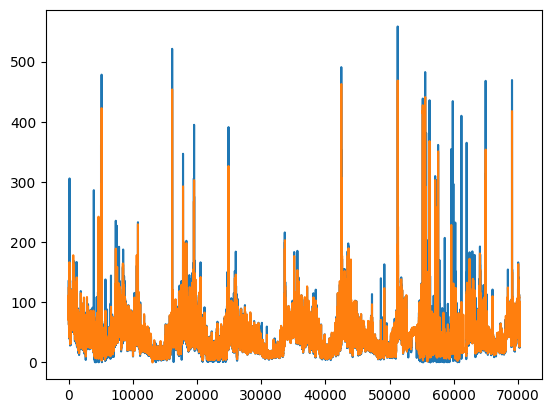

In [59]:
plt.plot(y['PM2.5 (µg/m³)'])
plt.plot(pred_check)
plt.show()

In [60]:
from sklearn.metrics import r2_score

r2 = r2_score(y['PM2.5 (µg/m³)'], pred_check)
print("R² score:", r2)

R² score: 0.9144362760563945


In [61]:
import joblib
joblib.dump(model, 'Maharashtra_PM2.5_µgm³.pkl')

['Maharashtra_PM2.5_µgm³.pkl']

In [62]:
model.fit(X, y['PM10 (µg/m³)'])

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=True, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=5, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=150, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [63]:
pred_check2 = model.predict(X)

In [64]:
r2 = r2_score(y['PM10 (µg/m³)'], pred_check2)
print("R² score:", r2)

R² score: 0.9170428007257108


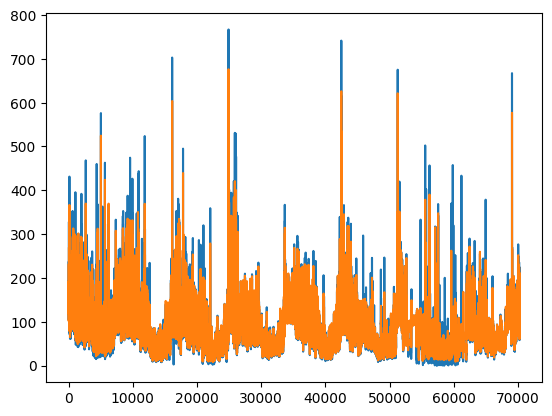

In [65]:
plt.plot(y['PM10 (µg/m³)'])
plt.plot(pred_check2)
plt.show()

In [66]:
joblib.dump(model, 'Maharashtra_PM10_µgm³.pkl')

['Maharashtra_PM10_µgm³.pkl']